# Effect of Mixing

D0 mixing has an impact on the Dalitz plot distribution of the decay products. Since some amplitudes are suppressed or enhanced depending on the mixing, the Dalitz plot can show a different distribution than expected from a simple phase space model.
This effect is important when correcting the Dalitz plot for reconstruction biases in the bin-flip analysis.
To account for this, we study the mixing parameters and their impact on the Dalitz plot distribution using a Monte Carlo simulation.

Each flavor of $D^0$ meson can be described by:
$$
\begin{align*}
T_f(m^2_+, m^2_−; t) &= A_f(m^2_+, m^2_−) g_+(t) + \overline{A}_f (m^2_-, m^2_+) \frac{q}{p}g_−(t),\\
\overline{T}_f(m^2_+, m^2_−; t) &= \overline{A}_f(m^2_+, m^2_−) g_+(t) + A_f (m^2_-, m^2_+) \frac{p}{q}g_−(t)
\end{align*}
$$
When combining $D^0$ and $\overline{D}^0$ decays, the resulting amplitude is:
$$
\begin{align*}
|T_f(m^2_+, m^2_−; t)|^2 + |\overline{T}_f(m^2_+, m^2_−; t)|^2 &= \frac{1}{2} e^{−t} \left[\left(|A_f(m^2_+, m^2_−)|^2 + |A_f (m^2_-, m^2_+)|^2\right)(e^{−ty} + e^{ty}) +\right.\\
&\phantom{=}\left.2|A_f (m^2_-, m^2_+)||A_f(m^2_+, m^2_−)| (cos(\delta_{+−} − \delta_{−+})(e^{−ty} − e^{ty}))\right]\\
  &\simeq e^{−t} \left[|A_f(m^2_+, m^2_−)|^2 + |A_f (m^2_-, m^2_+)|^2)(1 + (ty)^2)  −\right.\\
  &\phantom{=}\left.2|A_f (m^2_-, m^2_+)||A_f(m^2_+, m^2_−)| (cos(\delta_{+−} − \delta_{−+}) (ty))\right]
\end{align*}
$$


In the Run2 bin-flip analysis, the determination of this effect is done by using the 2D map of $|A_f(m^2_+, m^2_−)|^2$ and the values of the strong phase difference $\delta_{+−} − \delta_{−+}$, which is determined from the BES-III external input.
Since we have coded the full model here, we could perform the calculation directly from the amplitudes.

In [1]:
# Import AmpliTF modules
import amplitf.interface as atfi
import amplitf.kinematics as atfk
import amplitf.dynamics as atfd
import amplitf.likelihood as atfl
from amplitf.phasespace.dalitz_phasespace import DalitzPhaseSpace

# Import TFA modules
import tfa.toymc as tft
import tfa.plotting as tfp
import tfa.optimisation as tfo

2025-06-05 11:25:57.041979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749115557.061787  934433 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749115557.067852  934433 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749115557.083285  934433 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749115557.083301  934433 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749115557.083304  934433 computation_placer.cc:177] computation placer alr

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


I0000 00:00:1749115559.456037  934433 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46761 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:41:00.0, compute capability: 8.6


In [2]:
# Phase space
# Masses of final state particles
from particle.particle import literals as lp
# Dalitz Particles
mkz = atfi.const(lp.K_S_0.mass/1000)
mpi = atfi.const(lp.pi_plus.mass/1000)
md = atfi.const(lp.D_0.mass/1000)
meta = atfi.const(lp.eta.mass/1000.)
metap = atfi.const(lp.etap_958.mass/1000.)
phsp = DalitzPhaseSpace(mpi, mkz, mpi, md)

In [3]:
from context import models
from models.d02kspipi import babar2008_model_amp
from models.helpers import decode_model, plot_data

In [4]:
belle_model = decode_model('../../d02kspipi_toys/generator/inputs/belle_model.txt')

In [86]:
def babar_model_amp(x):
    return babar2008_model_amp(x, phsp,
        atfi.const(belle_model['rho770_Mass'][0]),
        atfi.const(belle_model['rho770_Width'][0]),
        atfi.const(belle_model['Kstar892_Mass'][0]),
        atfi.const(belle_model['Kstar892_Width'][0]),
        atfi.const(belle_model['Kstartwo1430_Mass'][0]),
        atfi.const(belle_model['Kstartwo1430_Width'][0]),
        atfi.const(belle_model['Kstar1410_Mass'][0]),
        atfi.const(belle_model['Kstar1410_Width'][0]),
        atfi.const(belle_model['Kstar1680_Mass'][0]),
        atfi.const(belle_model['Kstar1680_Width'][0]),
        atfi.const(belle_model['omega_Mass'][0]),
        atfi.const(belle_model['omega_Width'][0]),
        atfi.const(belle_model['ftwo1270_Mass'][0]),
        atfi.const(belle_model['ftwo1270_Width'][0]),
        atfi.const(belle_model['rho1450_Mass'][0]),
        atfi.const(belle_model['rho1450_Width'][0]),
        # LASS
        atfi.const(belle_model['LASS_a'][0]),
        atfi.const(belle_model['LASS_r'][0]),
        atfi.const(1.4617),
        atfi.const(0.2683),
        atfi.const(belle_model['LASS_R'][0]),
        atfi.const(belle_model['LASS_phi_R'][0]),
        atfi.const(belle_model['LASS_F'][0]),
        atfi.const(belle_model['LASS_phi_F'][0]),
        # K matrix model parameters
        atfi.const( [0.651, 1.2036, 1.55817, 1.21, 1.82206] ),
        atfi.const( [ [0.22889, -0.55377, 0, -0.39899, -0.34639],
                        [0.94128, 0.55095, 0, 0.39065, 0.31503],
                        [0.36856, 0.23888, 0.55639, 0.18340, 0.18681],
                        [0.33650, 0.40907, 0.85679, 0.19906, -0.00984],
                        [0.18171, -0.17558, -0.79658, -0.00355, 0.22358]] ),
        atfi.const(-3.92637),
        atfi.const([ [  0.23399,  0.15044, -0.20545,  0.32825,  0.35412],
                   [  0.15044, 0, 0, 0, 0],
                   [ -0.20545, 0, 0, 0, 0],
                   [  0.32825, 0, 0, 0, 0],
                   [  0.35412, 0, 0, 0, 0]]),
        atfi.stack([belle_model[f'Kmatrix_beta{i}_realpart'][0]+\
                    1.j*belle_model[f'Kmatrix_beta{i}_imaginarypart'][0] for i in range(1, 6)]),
        atfi.const(-0.070000000000000),
        atfi.stack([belle_model[f'Kmatrix_f_prod_1{i}_realpart'][0]+\
                    1.j*belle_model[f'Kmatrix_f_prod_1{i}_imaginarypart'][0] for i in range(1, 6)]),
        [[mpi,mpi], [mkz, mkz], [mpi], [meta, meta], [meta, metap]])

def Af(x, switches=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0]):#15 * [1]):
    return babar_model_amp(x)(
        switches=switches,
        a1r=atfi.const(1.0),
        a1i=atfi.const(0.0),
        a2r=atfi.const(belle_model['Kstar892minus_realpart'][0]),
        a2i=atfi.const(belle_model['Kstar892minus_imaginarypart'][0]),
        a3r=atfi.const(belle_model['Kstarzero1430minus_realpart'][0]),
        a3i=atfi.const(belle_model['Kstarzero1430minus_imaginarypart'][0]),
        a4r=atfi.const(belle_model['Kstartwo1430minus_realpart'][0]),
        a4i=atfi.const(belle_model['Kstartwo1430minus_imaginarypart'][0]),
        a5r=atfi.const(belle_model['Kstar1410minus_realpart'][0]),
        a5i=atfi.const(belle_model['Kstar1410minus_imaginarypart'][0]),
        a6r=atfi.const(belle_model['Kstar1680minus_realpart'][0]),
        a6i=atfi.const(belle_model['Kstar1680minus_imaginarypart'][0]),
        a7r=atfi.const(belle_model['Kstar892plus_realpart'][0]),
        a7i=atfi.const(belle_model['Kstar892plus_imaginarypart'][0]),
        a8r=atfi.const(belle_model['Kstarzero1430plus_realpart'][0]),
        a8i=atfi.const(belle_model['Kstarzero1430plus_imaginarypart'][0]),
        a9r=atfi.const(belle_model['Kstartwo1430plus_realpart'][0]),
        a9i=atfi.const(belle_model['Kstartwo1430plus_imaginarypart'][0]),
        a10r=atfi.const(belle_model['Kstar1410plus_realpart'][0]),
        a10i=atfi.const(belle_model['Kstar1410plus_imaginarypart'][0]),
        a11r=atfi.const(belle_model['Kstar1680plus_realpart'][0]),
        a11i=atfi.const(belle_model['Kstar1680plus_imaginarypart'][0]),
        a12r=atfi.const(belle_model['omega_realpart'][0]),
        a12i=atfi.const(belle_model['omega_imaginarypart'][0]),
        a13r=atfi.const(belle_model['ftwo1270_realpart'][0]),
        a13i=atfi.const(belle_model['ftwo1270_imaginarypart'][0]),
        a14r=atfi.const(belle_model['rho1450_realpart'][0]),
        a14i=atfi.const(belle_model['rho1450_imaginarypart'][0]),
    )

# def Afbar(x, switches=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0]):#15 * [1]):
#     return babar_model_amp(x)(
#         switches=switches,
#         a1r=atfi.const(1.0),
#         a1i=atfi.const(0.0),
#         a2r=atfi.const(belle_model['Kstar892plus_realpart'][0]),
#         a2i=atfi.const(belle_model['Kstar892plus_imaginarypart'][0]),
#         a3r=atfi.const(belle_model['Kstarzero1430plus_realpart'][0]),
#         a3i=atfi.const(belle_model['Kstarzero1430plus_imaginarypart'][0]),
#         a4r=atfi.const(belle_model['Kstartwo1430plus_realpart'][0]),
#         a4i=atfi.const(belle_model['Kstartwo1430plus_imaginarypart'][0]),
#         a5r=atfi.const(belle_model['Kstar1410plus_realpart'][0]),
#         a5i=atfi.const(belle_model['Kstar1410plus_imaginarypart'][0]),
#         a6r=atfi.const(belle_model['Kstar1680plus_realpart'][0]),
#         a6i=atfi.const(belle_model['Kstar1680plus_imaginarypart'][0]),
#         a7r=atfi.const(belle_model['Kstar892minus_realpart'][0]),
#         a7i=atfi.const(belle_model['Kstar892minus_imaginarypart'][0]),
#         a8r=atfi.const(belle_model['Kstarzero1430minus_realpart'][0]),
#         a8i=atfi.const(belle_model['Kstarzero1430minus_imaginarypart'][0]),
#         a9r=atfi.const(belle_model['Kstartwo1430minus_realpart'][0]),
#         a9i=atfi.const(belle_model['Kstartwo1430minus_imaginarypart'][0]),
#         a10r=atfi.const(belle_model['Kstar1410minus_realpart'][0]),
#         a10i=atfi.const(belle_model['Kstar1410minus_imaginarypart'][0]),
#         a11r=atfi.const(belle_model['Kstar1680minus_realpart'][0]),
#         a11i=atfi.const(belle_model['Kstar1680minus_imaginarypart'][0]),
#         a12r=atfi.const(belle_model['omega_realpart'][0]),
#         a12i=atfi.const(belle_model['omega_imaginarypart'][0]),
#         a13r=atfi.const(belle_model['ftwo1270_realpart'][0]),
#         a13i=atfi.const(belle_model['ftwo1270_imaginarypart'][0]),
#         a14r=atfi.const(belle_model['rho1450_realpart'][0]),
#         a14i=atfi.const(belle_model['rho1450_imaginarypart'][0]),
#     )

def Afbar(x):
    return Af(x[:,::-1])

In [6]:
belle_model

{'SigNorm': [0.0, 0.0],
 'nonResAmp': [0.0, -999.0],
 'nonResPh': [0.0, -999.0],
 'omegaAmp': [0.038791318344843, 0.000485268275621],
 'omegaPh': [2.107370203581449, 0.012003065245212],
 'Kstar892minus_Amp': [1.720436206046246, 0.006338333542338],
 'Kstar892minus_Ph': [2.388358772635172, 0.004227745091072],
 'Kstarzero1430minus_Amp': [2.362144656831594, 0.063542164457913],
 'Kstarzero1430minus_Ph': [1.735144928431722, 0.029258250508315],
 'Kstartwo1430minus_Amp': [1.272677892930591, 0.016205040955539],
 'Kstartwo1430minus_Ph': [-0.769095387411083, 0.013015314144088],
 'Kstar1680minus_Amp': [3.307642176743471, 0.197801960348389],
 'Kstar1680minus_Ph': [-2.062227483594043, 0.054875902770026],
 'Kstar1410minus_Amp': [0.286927014847305, 0.030500538645209],
 'Kstar1410minus_Ph': [1.734618647446857, 0.096350455851831],
 'Kstar892plus_Amp': [0.164179194147053, 0.00263473938937],
 'Kstar892plus_Ph': [-0.735902683667772, 0.014739420816336],
 'Kstarzero1430plus_Amp': [0.106521701166492, 0.011409

Define the mixing parameters:

In [20]:
tdz = atfi.const(1.)
x_mix = atfi.const(0.004)#atfi.const(0.004)
y_mix = atfi.const(0.0064)#atfi.const(0.0064)
qop_mix = atfi.const(1)
phi_mix = atfi.const(0)
qoverp = atfi.complex( qop_mix * atfi.cos(phi_mix), 
                       qop_mix * atfi.sin(phi_mix) )

Define the phase space of interest:
- $m^2_0$ in $[\min(m^2_0), \max(m^2_0)]$
- $\cos(\theta_{\pi\pi})$ in $[-1, 1]$
- $t/\tau_{D^0}$ in $[0.5, 8]$

In [89]:
import tensorflow as tf
shape = (50, 50, 50)
tmin, tmax = atfi.const(0.3), atfi.const(8.0)
m0min, m0max = phsp.minac, phsp.maxac
cthmin, cthmax = atfi.const(-1.0), atfi.const(1.0)
# ...existing code...
x = tf.linspace(tmin, tmax, shape[0])    # shape (nx,)
y = tf.linspace(m0min, m0max, shape[1])  # shape (ny,)
z = tf.linspace(cthmin, cthmax, shape[2])# shape (nz,)

# meshgrid restituisce tre array 3D con shape (nx, ny, nz)
X, Y, Z = tf.meshgrid(x, y, z, indexing='ij')
plt_space = tf.stack([X, Y, Z], axis=-1)

Define functions to extract $m_0^\prime$ and $\theta^\prime$

In [10]:
def m0prime(phsp, m2pipi):
    m0 = atfi.sqrt(m2pipi)
    return atfi.acos( 2.0 * (m0 - atfi.sqrt(phsp.minac)) / (atfi.sqrt(phsp.maxac)- atfi.sqrt(phsp.minac)) - 1.0 ) / atfi.pi()

def thprime(costh):
    return atfi.acos(costh) / atfi.pi()

Calculate mixing amplitude for $D^0$ decays, first calculate the propagators

In [11]:
import amplitf.mixing as atfm

In [87]:
def calculate_amplitude(x, x_mix_par, y_mix_par):
    t = x[:,0]
    mpipi = x[:,1]
    costh = x[:,2]
    te_nomix = atfi.cast_complex(atfi.exp( -t / atfi.const(2.0) ))
    tep = atfm.psip(t, y_mix_par, atfi.const(1.0))
    tem = atfm.psim(t, y_mix_par, atfi.const(1.0))
    tei = atfm.psii(t, x_mix_par, atfi.const(1.0))
    m0p = m0prime(phsp, mpipi)
    thp = thprime(costh)
    # Calculate the amplitudes
    phsp_dz = phsp.from_square_dalitz_plot(m0p, thp)
    # phsp_dzb = phsp_dz[:,::-1] # swap the order of the last two particles
    # dens = atfm.mixing_density(Af(phsp_dz), Afbar(phsp_dz), qoverp, tep, tem, tei)
    # dens += atfm.mixing_density(Af(phsp_dzb), Afbar(phsp_dzb), qoverp, tep, tem, tei)
    # nomix_dens = atfd.density(Af(phsp_dz) * te_nomix)
    # nomix_dens+= atfd.density(Af(phsp_dzb) * te_nomix)
    ampl_dz = Af(phsp_dz)
    ampl_dzb = Afbar(phsp_dz)
    dens = atfm.mixing_density(ampl_dz, ampl_dzb, qoverp, tep, tem, tei)
    dens += atfm.mixing_density(ampl_dzb, ampl_dz, qoverp, tep, tem, tei)
    nomix_dens = atfd.density(ampl_dz * te_nomix)
    nomix_dens+= atfd.density(ampl_dzb * te_nomix)
    return dens / nomix_dens

In [57]:
plt_space_flat = tf.reshape(plt_space, (-1, 3))

In [48]:
mix_eff = calculate_amplitude(plt_space_flat, x_mix, y_mix)

Project the amplitude over two distributions.
Need to average over one dimension. Third dimension ($\cos\theta_{\pi}$) is running from 0-9; Second dimension ($m_{\pi\pi}$) is a `shape[1]` to the power of 1 times 0-9; First dimension (t) is `shape[2]` to the power of 2 times 0-9. 

In [101]:
import matplotlib.pyplot as plt
def plot_mixing_efficiency(eff, integ_axis=0, vlimits=None, ax=None):
    eff = tf.reduce_mean(eff, axis=integ_axis)
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    else:
        fig = ax.get_figure()
    if vlimits is not None:
        limits = vlimits[:integ_axis] + vlimits[integ_axis+1:]
        xmin, xmax = limits[-1]
        ymin, ymax = limits[0]
        im = ax.imshow(eff, origin='lower', extent=(xmin, xmax, ymin, ymax), aspect='auto')
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymin, ymax)
    else:
        im = ax.imshow(eff, origin='lower')#, extent=(0.5, 8.0, phsp.minac, phsp.maxac), aspect='auto')
    fig.colorbar(im, ax=ax, label='Relative Abundance')
    cospipi_label = r'$\cos\theta_{\pi^+\pi^-}$'
    m2pipi_label = r'$m^2(\pi^+\pi^-)$ ($GeV^2/c^4$)'
    t_label = r'$t/\tau_{D^0}$'
    if integ_axis==0:
        ax.set_xlabel(cospipi_label)
        ax.set_ylabel(m2pipi_label)
    if integ_axis==1:
        ax.set_xlabel(cospipi_label)
        ax.set_ylabel(t_label)
    if integ_axis==2:
        ax.set_xlabel(m2pipi_label)
        ax.set_ylabel(t_label)
    #plt.ylabel('m0 (GeV)')
    ax.set_title('Mixing Effect')
    return fig, ax

In [49]:
mix_eff_reshaped = tf.reshape(mix_eff, shape)
# correct by the decay time distribution
mix_eff_reshaped = mix_eff_reshaped# / atfi.exp(- tdz * plt_space[..., 0])

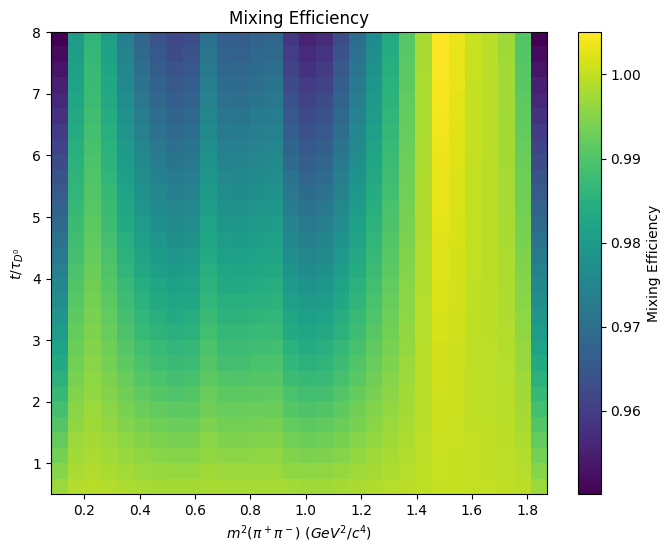

In [50]:
fig, ax = plot_mixing_efficiency(mix_eff_reshaped, integ_axis=2, 
                                 vlimits=[(tmin, tmax),(m0min, m0max),(cthmin, cthmax)])

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

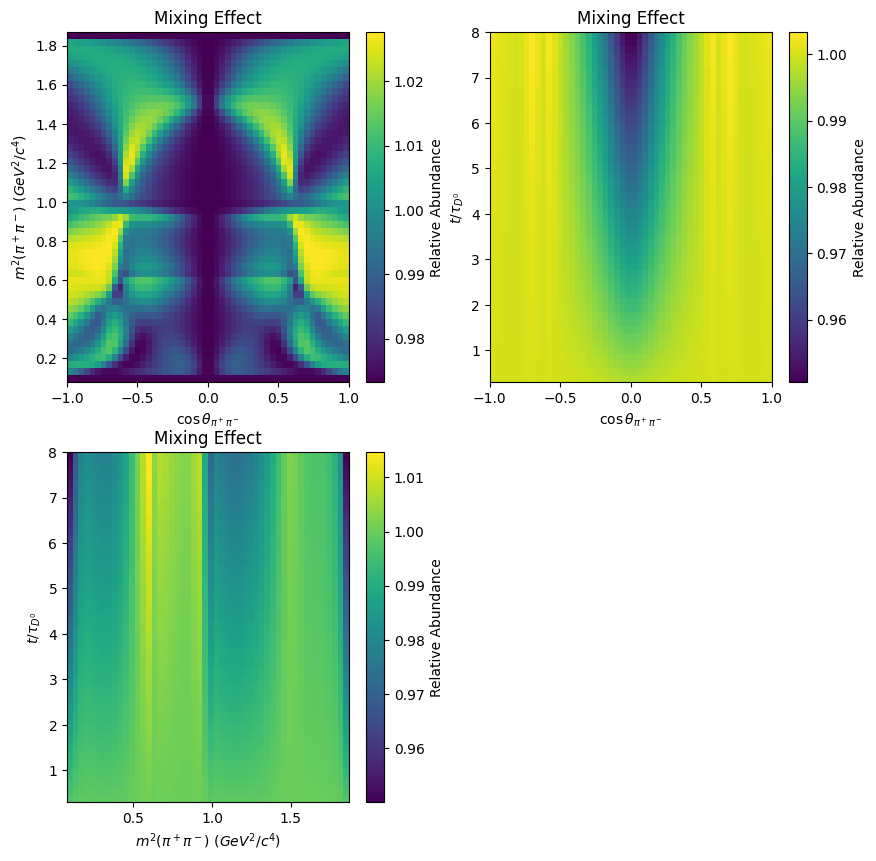

In [102]:
x_mix = atfi.const(0.004)
y_mix = atfi.const(0.0064)#atfi.const(0.0064)
mix_eff = calculate_amplitude(plt_space_flat, x_mix, y_mix)
mix_eff_reshaped = tf.reshape(mix_eff, shape)
fig, ax = plt.subplots(2,2,figsize=(10, 10))
plot_mixing_efficiency(mix_eff_reshaped, integ_axis=0, 
                        vlimits=[(tmin, tmax),(m0min, m0max),(cthmin, cthmax)], ax=ax[0,0])
plot_mixing_efficiency(mix_eff_reshaped, integ_axis=1, 
                        vlimits=[(tmin, tmax),(m0min, m0max),(cthmin, cthmax)], ax=ax[0,1])
plot_mixing_efficiency(mix_eff_reshaped, integ_axis=2, 
                        vlimits=[(tmin, tmax),(m0min, m0max),(cthmin, cthmax)], ax=ax[1,0])
ax[1, 1].axis('off')

In [64]:
mpipi = plt_space_flat[:,1]
costh = plt_space_flat[:,2]
m0p = m0prime(phsp, mpipi)
thp = thprime(costh)
tt = phsp.from_square_dalitz_plot(m0p, thp)
print(tt)
tt = tt[:, ::-1]
print(tt)
print(phsp.from_square_dalitz_plot(m0p, -thp))

tf.Tensor(
[[1.84314258 1.84314257]
 [1.84314258 1.84314257]
 [1.84314258 1.84314257]
 ...
 [0.94744476 0.94744482]
 [0.94744476 0.94744482]
 [0.94744476 0.94744482]], shape=(125000, 2), dtype=float64)
tf.Tensor(
[[1.84314257 1.84314258]
 [1.84314257 1.84314258]
 [1.84314257 1.84314258]
 ...
 [0.94744482 0.94744476]
 [0.94744482 0.94744476]
 [0.94744482 0.94744476]], shape=(125000, 2), dtype=float64)
tf.Tensor(
[[1.84314258 1.84314257]
 [1.84314258 1.84314257]
 [1.84314258 1.84314257]
 ...
 [0.94744476 0.94744482]
 [0.94744476 0.94744482]
 [0.94744476 0.94744482]], shape=(125000, 2), dtype=float64)
